# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import logging

# Load and Prepare Data

In [2]:
df = pd.read_csv("database SFRC.csv")

In [3]:
df.head(5)

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.4875,565.0,0.75,112.9500
1,251.0,150.0,25.3,0.0267,3.0876,0.4875,565.0,0.75,79.0650
2,251.0,150.0,27.9,0.0267,3.0876,0.6500,565.0,1.00,109.1850
3,251.0,150.0,26.2,0.0267,3.0876,0.6500,565.0,1.00,123.4920
4,251.0,150.0,28.1,0.0267,3.0876,0.9750,565.0,1.50,111.0675


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   d(mm)    488 non-null    float64
 1   B(mm)    488 non-null    float64
 2   fc(Mpa)  488 non-null    float64
 3   Rr       488 non-null    float64
 4   av/d     488 non-null    float64
 5   F        488 non-null    float64
 6   fy(Mpa)  488 non-null    float64
 7   vf%      488 non-null    float64
 8   Vu (KN)  488 non-null    float64
dtypes: float64(9)
memory usage: 34.4 KB


# EDA - Exploratory Data Analysis

In [5]:
# Check the missing Values
df.isnull().sum()

d(mm)      0
B(mm)      0
fc(Mpa)    0
Rr         0
av/d       0
F          0
fy(Mpa)    0
vf%        0
Vu (KN)    0
dtype: int64

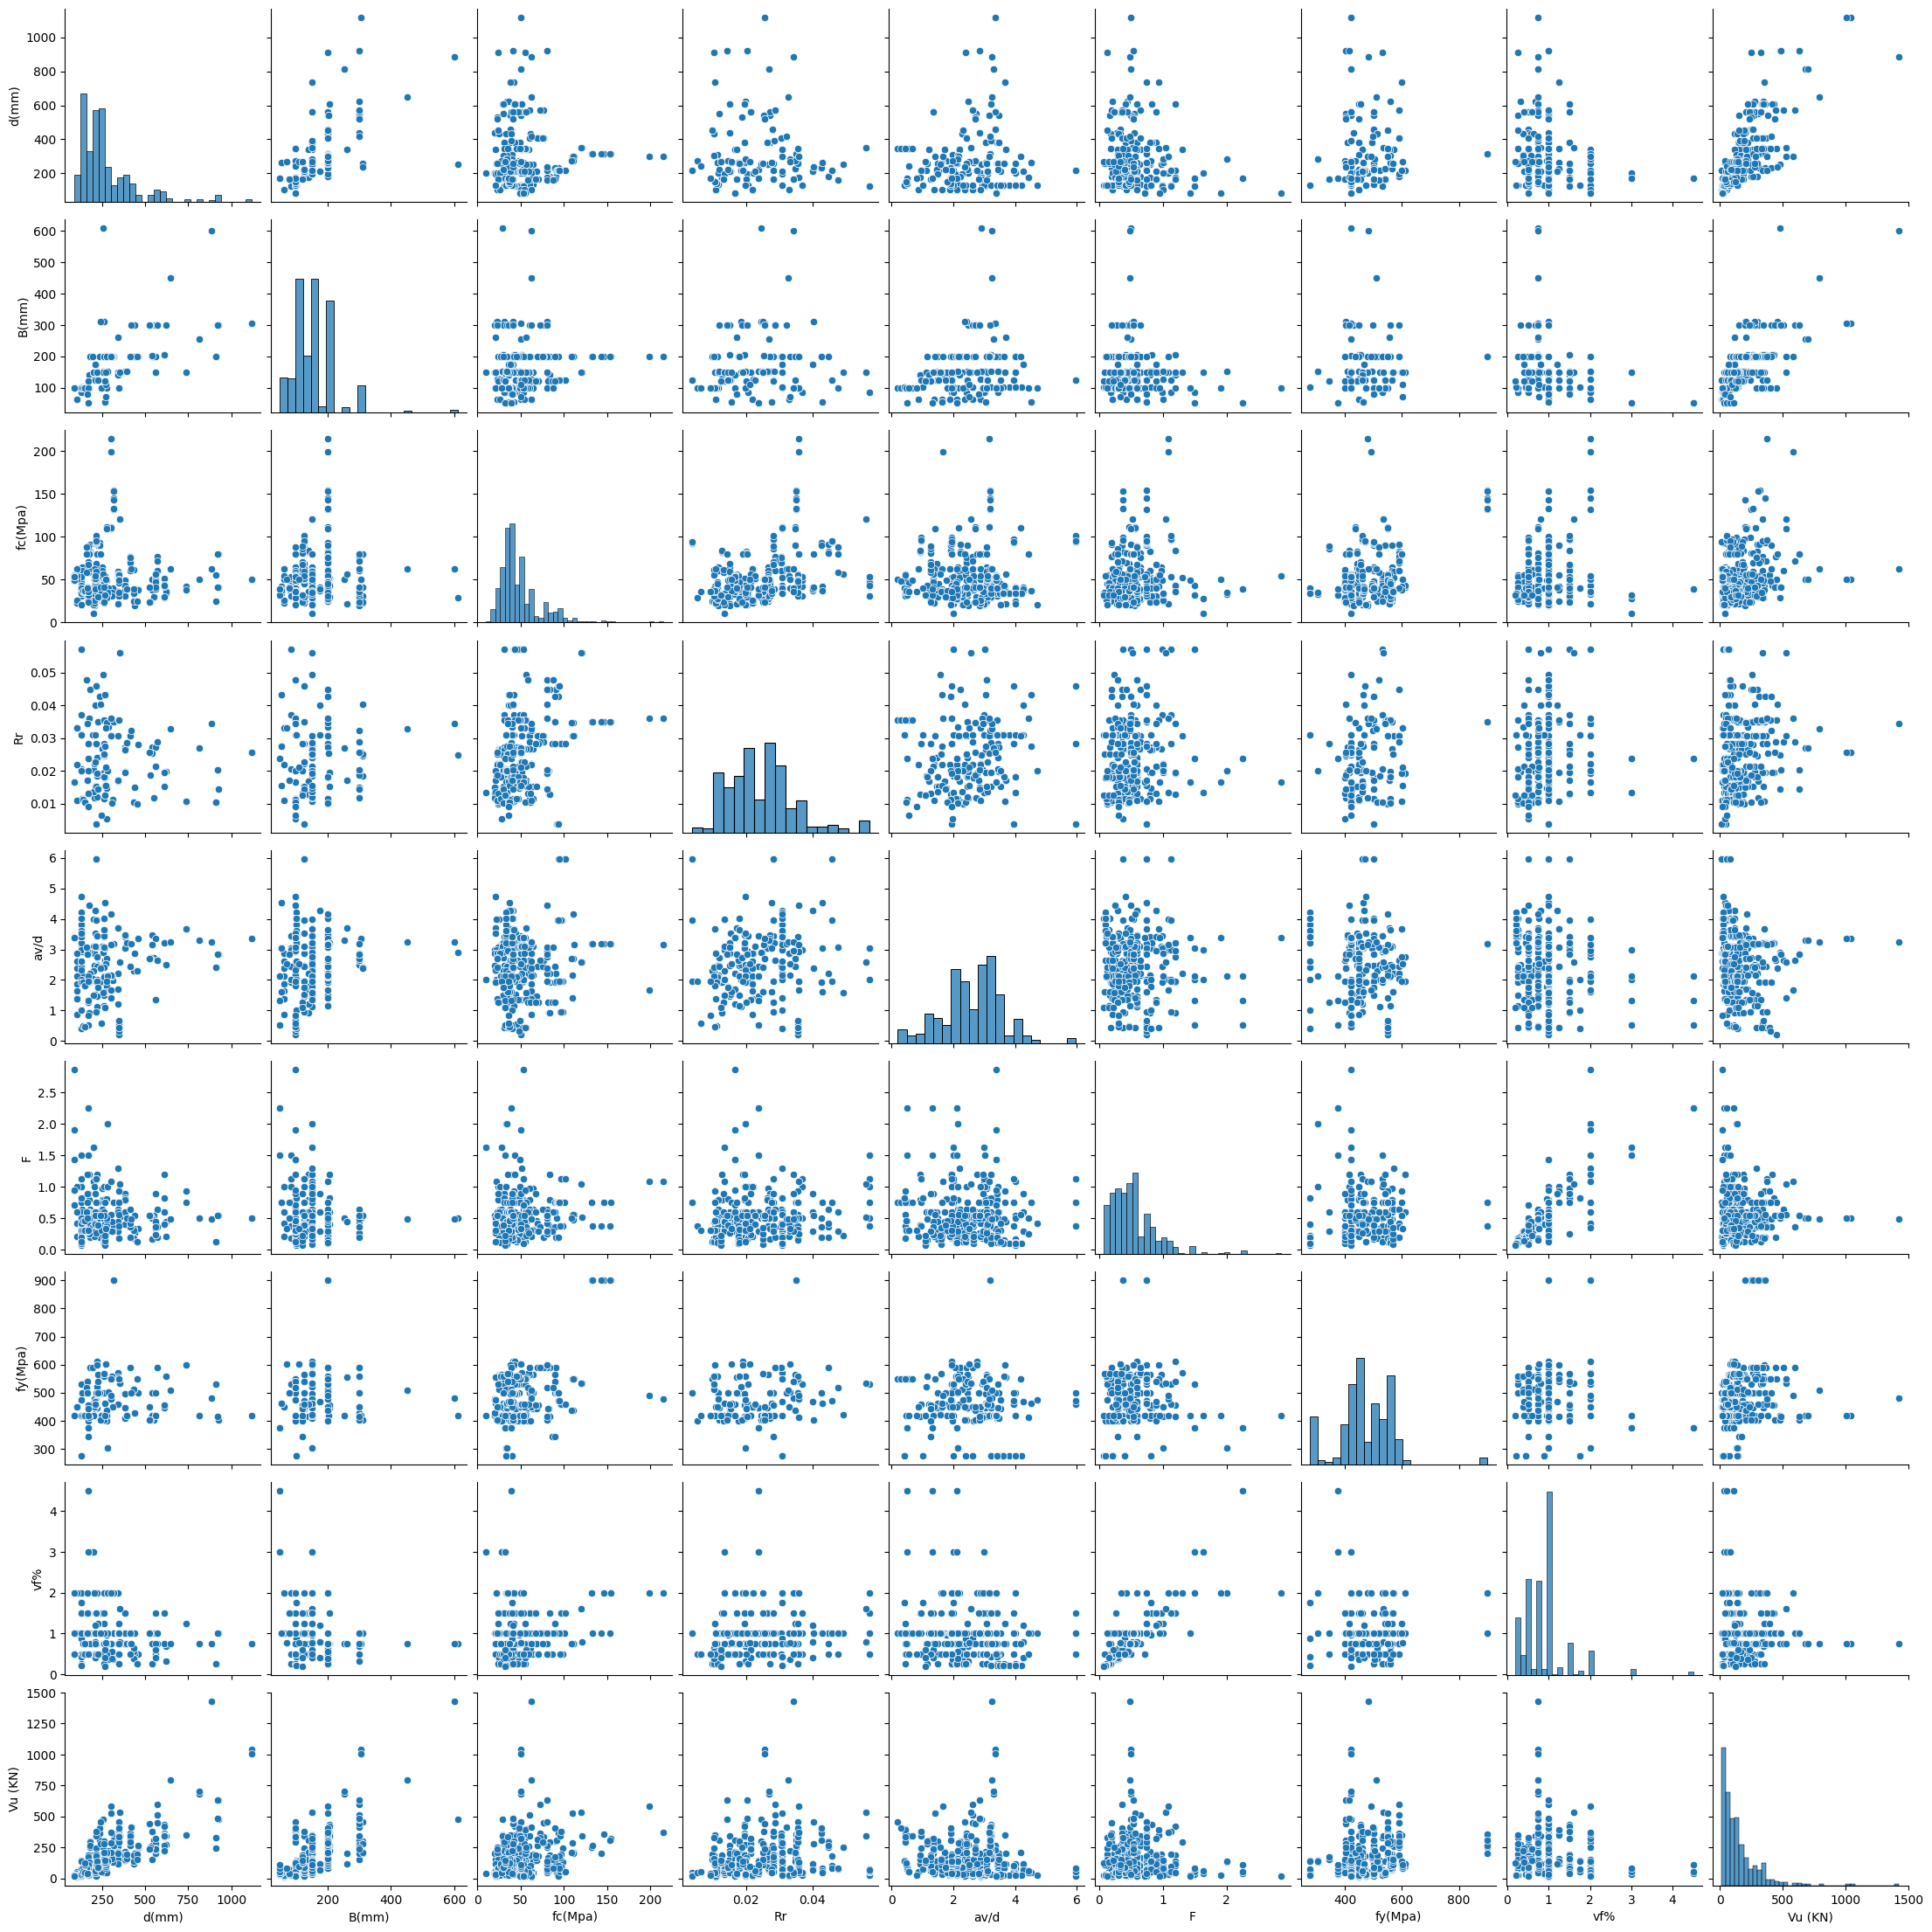

In [6]:
 # Visualize the data using seaborn Pairplots
sns.pairplot(df)
plt.show()

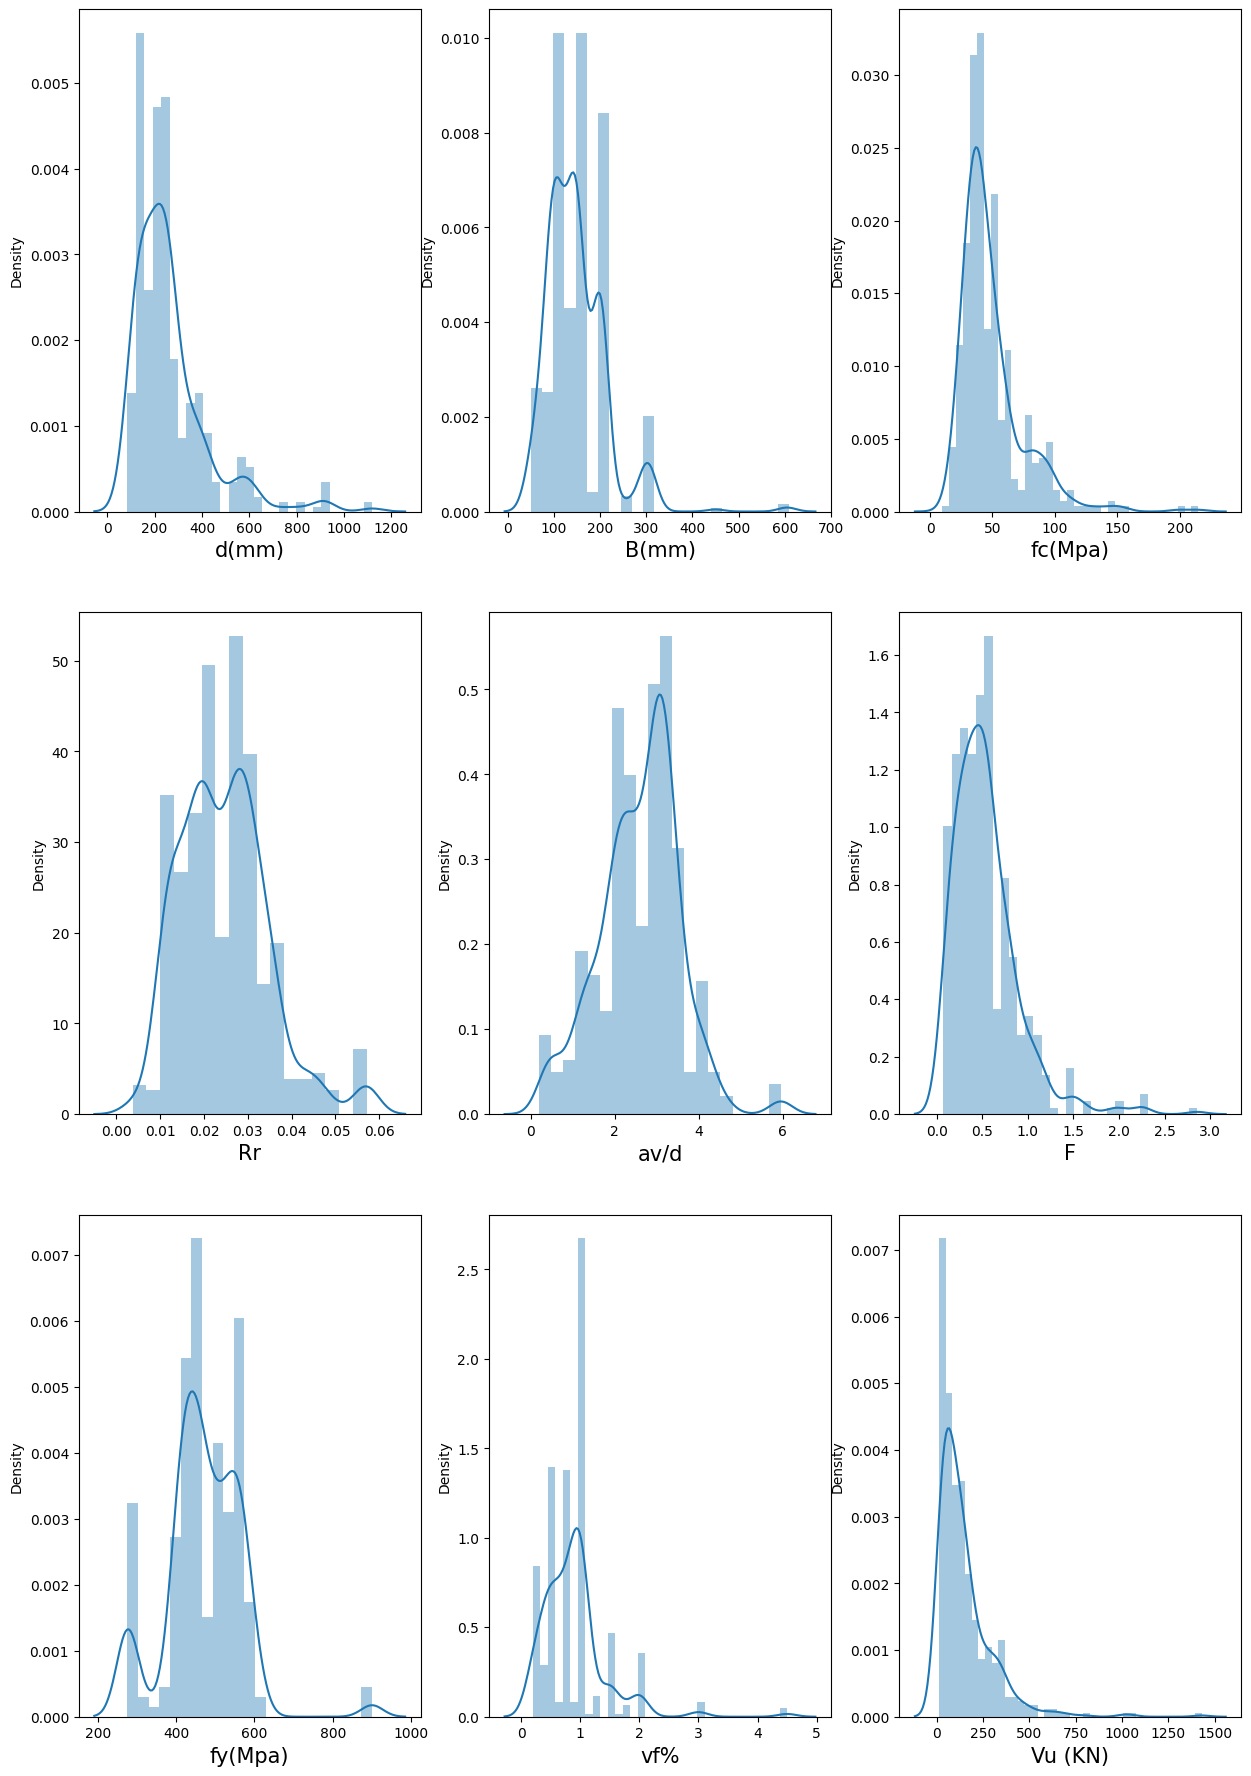

In [7]:
# Data Distribution plot
plt.figure(figsize=(15,30), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Data Transformation

In [8]:
# convert into DataFrame
data = pd.DataFrame(df)
data

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.487500,565.0,0.75,112.950000
1,251.0,150.0,25.3,0.0267,3.0876,0.487500,565.0,0.75,79.065000
2,251.0,150.0,27.9,0.0267,3.0876,0.650000,565.0,1.00,109.185000
3,251.0,150.0,26.2,0.0267,3.0876,0.650000,565.0,1.00,123.492000
4,251.0,150.0,28.1,0.0267,3.0876,0.975000,565.0,1.50,111.067500
...,...,...,...,...,...,...,...,...,...
483,300.0,200.0,215.0,0.0360,3.1667,1.090909,479.0,2.00,371.500000
484,300.0,200.0,199.0,0.0360,1.6667,1.090909,490.0,2.00,585.500000
485,266.0,120.0,31.9,0.0126,1.0902,0.075000,420.0,0.20,126.210909
486,266.0,120.0,31.9,0.0126,1.0902,0.150000,420.0,0.40,132.682909


In [9]:
X = df.drop(['Vu (KN)'], axis = 1)
y = df['Vu (KN)']
X.shape
y.shape

(488,)

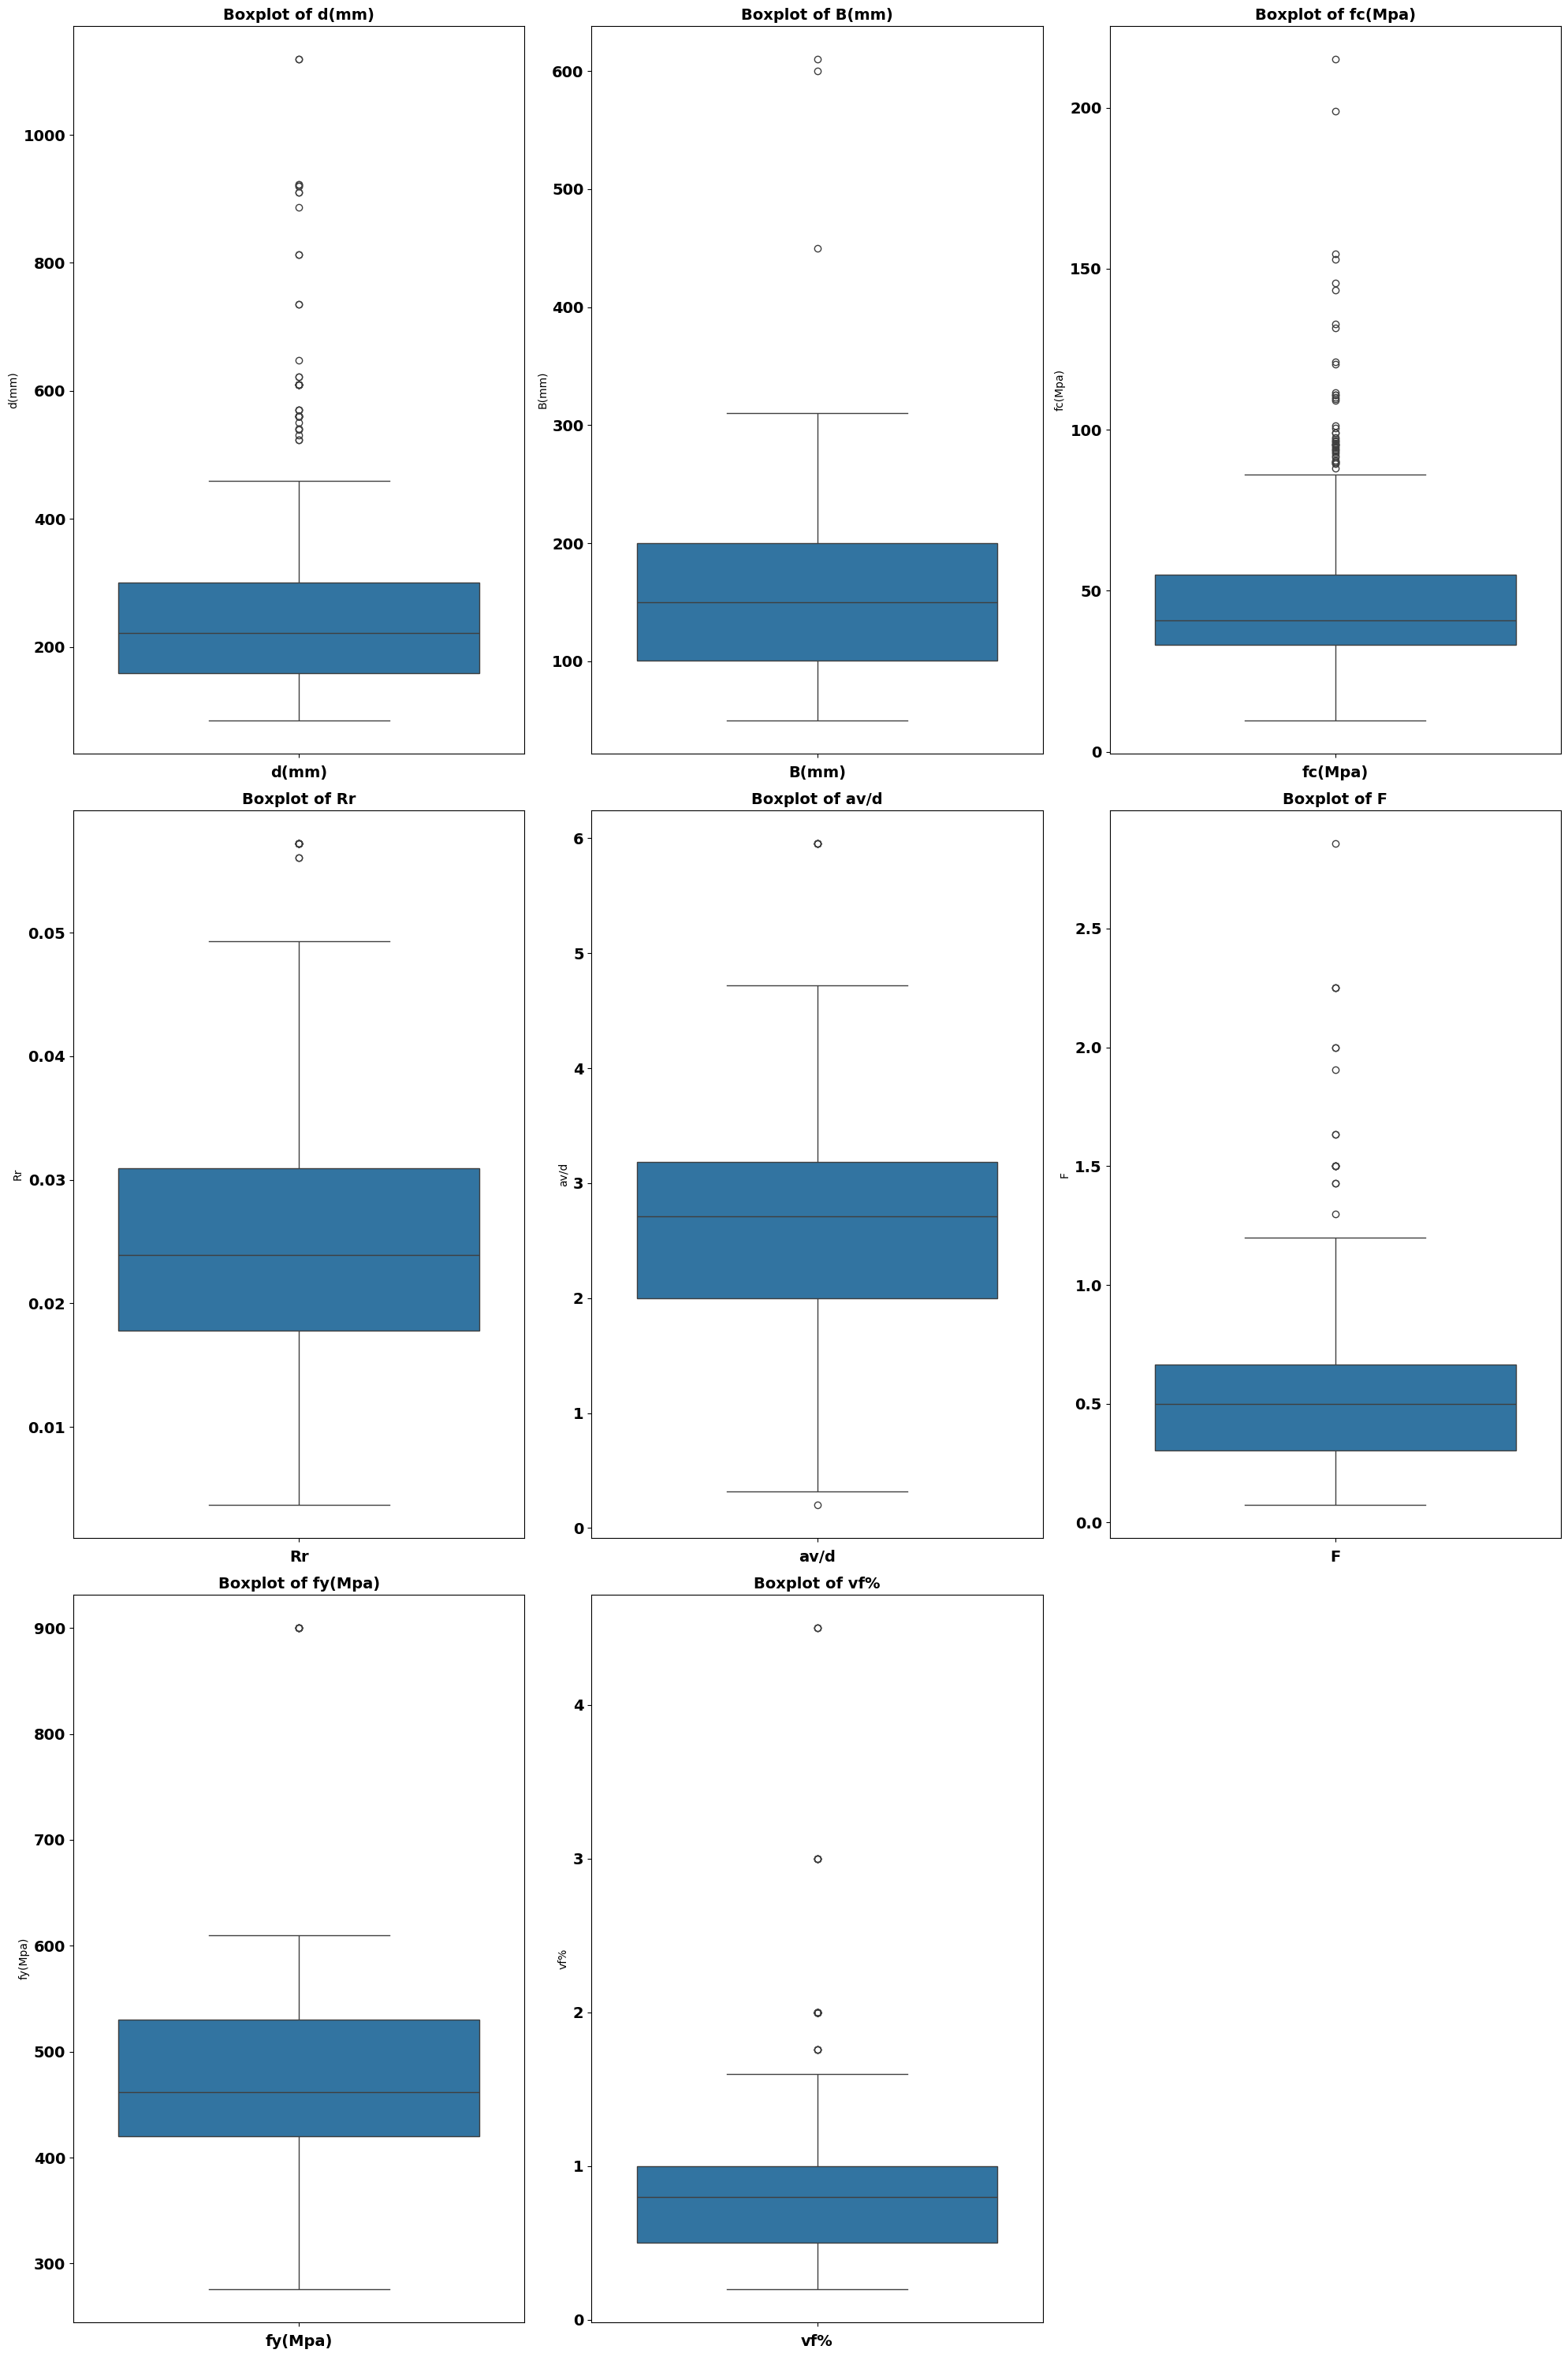

In [10]:
# check for outliers with Box plot

plt.figure(figsize=(20, 30), facecolor='white')  
plotnumber = 1

for column in X.columns:
    ax = plt.subplot((len(X.columns) // 3) + 1, 3, plotnumber)  
    sns.boxplot(y=X[column]) 
    
    # Move feature names to X-axis instead of Y-axis
    plt.xlabel(column, fontsize=14, fontweight='bold')  
    plt.title(f'Boxplot of {column}', fontsize=14, fontweight='bold')  
    
    # Ensure y-axis numbers are visible
    plt.yticks(fontsize=14, fontweight='bold')  
    
    plotnumber += 1

plt.tight_layout()  
plt.show()

In [11]:
df.describe()

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,264.202971,148.022746,48.991496,0.024563,2.604004,0.539549,470.245824,0.889170,148.364144
std,160.532443,64.874376,25.176735,0.010077,0.947298,0.359614,97.156011,0.549692,149.927020
min,85.250000,50.000000,9.770000,0.003700,0.202900,0.075000,275.862069,0.200000,12.824460
25%,159.000000,100.750000,33.220000,0.017800,2.000000,0.303000,420.000000,0.500000,47.534200
50%,222.000000,150.000000,40.750000,0.023900,2.713200,0.498750,462.000000,0.800000,108.816905
75%,300.000000,200.000000,55.075000,0.030900,3.184700,0.666094,530.000000,1.000000,190.221479
max,1118.000000,610.000000,215.000000,0.057200,5.953500,2.857500,900.000000,4.500000,1430.000000


# Distribution plot of target variable and features

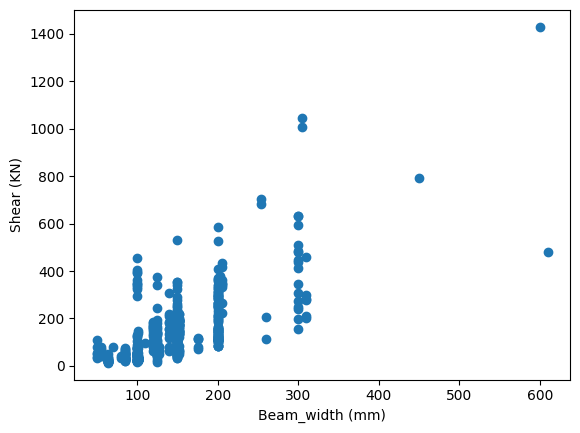

In [12]:
plt.scatter(df['B(mm)'],df['Vu (KN)'])
plt.xlabel('Beam_width (mm)')
plt.ylabel('Shear (KN)')
plt.show()

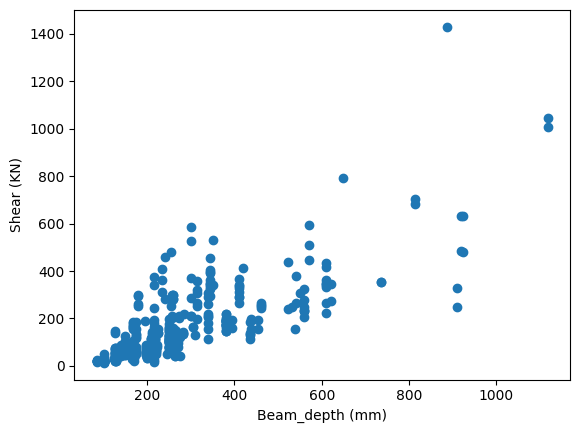

In [13]:
plt.scatter(df['d(mm)'],df['Vu (KN)'])
plt.xlabel('Beam_depth (mm)')
plt.ylabel('Shear (KN)')
plt.show()

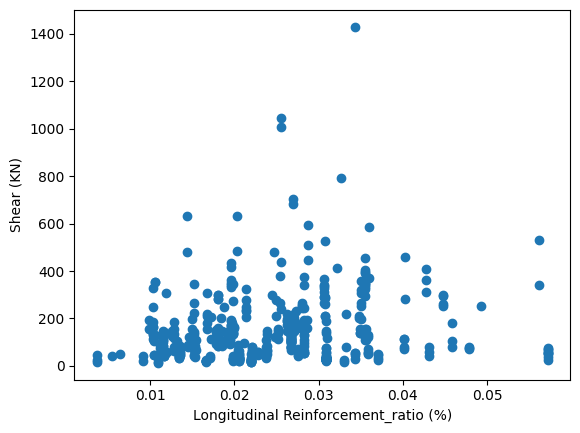

In [14]:
plt.scatter(df['Rr'],df['Vu (KN)'])
plt.xlabel('Longitudinal Reinforcement_ratio (%)')
plt.ylabel('Shear (KN)')
plt.show()

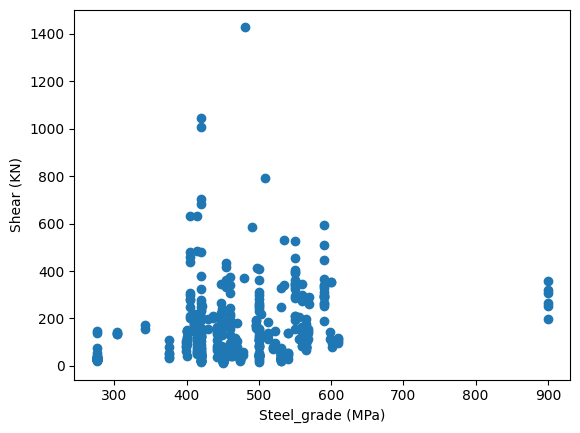

In [15]:
plt.scatter(df['fy(Mpa)'],df['Vu (KN)'])
plt.xlabel('Steel_grade (MPa)')
plt.ylabel('Shear (KN)')
plt.show()

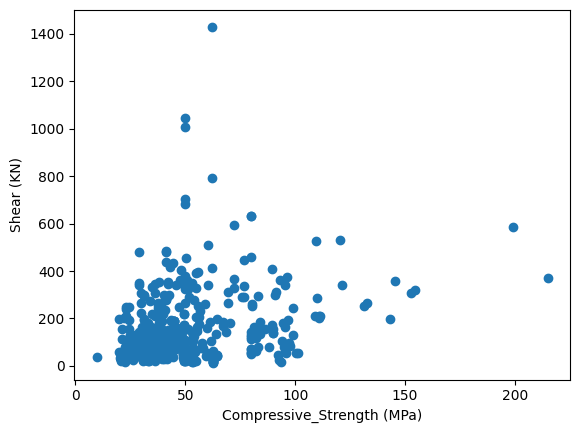

In [16]:
plt.scatter(df['fc(Mpa)'],df['Vu (KN)'])
plt.xlabel('Compressive_Strength (MPa)')
plt.ylabel('Shear (KN)')
plt.show()

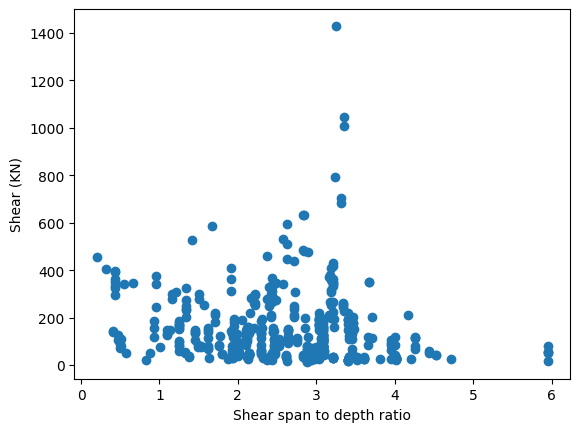

In [17]:
plt.scatter(df['av/d'],df['Vu (KN)'])
plt.xlabel('Shear span to depth ratio')
plt.ylabel('Shear (KN)')
plt.show()

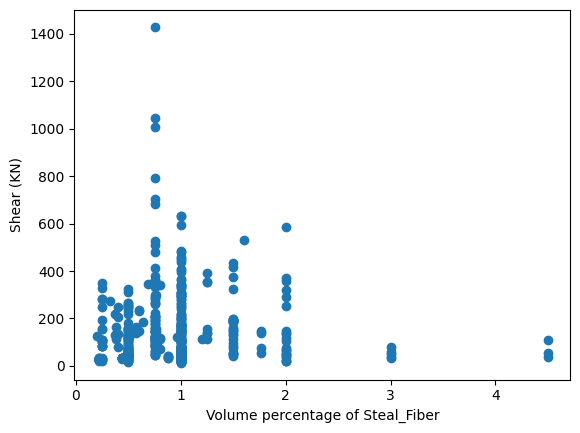

In [18]:
plt.scatter(df['vf%'],df['Vu (KN)'])
plt.xlabel('Volume percentage of Steal_Fiber')
plt.ylabel('Shear (KN)')
plt.show()

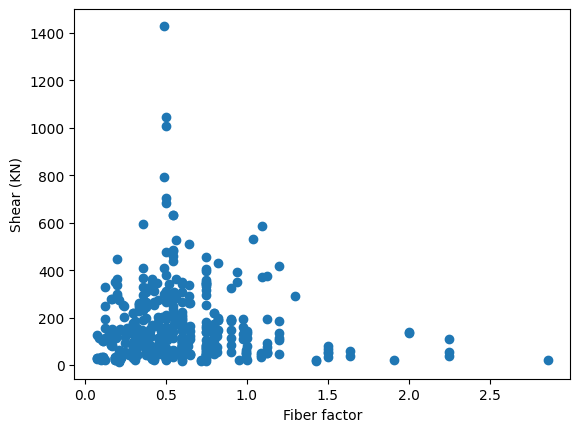

In [19]:
plt.scatter(df['F'],df['Vu (KN)'])
plt.xlabel('Fiber factor')
plt.ylabel('Shear (KN)')
plt.show()

# Scalarization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]], shape=(488, 8))

# Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 64)

In [22]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[-0.86984685, -0.70472042, -0.63096696, ..., -1.34585351,
        -2.12848978, -1.23728219],
       [-0.04561548,  0.02342565,  0.27565572, ..., -0.88526059,
        -0.55089788,  0.20080237],
       [-0.86984685, -0.70472042, -0.3704432 , ..., -0.36917375,
        -2.12848978, -0.02044141],
       ...,
       [-0.87628615, -0.94248241, -0.2317644 , ...,  2.83863388,
         0.63388899,  2.04450051],
       [ 0.02521691, -0.42237807, -0.68387332, ..., -1.13025365,
        -0.56176749, -0.90541652],
       [-0.11000855, -0.71958055, -0.51633651, ..., -0.65222319,
        -0.56176749, -0.72104671]], shape=(390, 8))

In [23]:
import pickle 
pickle.dump(scaler,open('scaling.pkl','wb'))

In [24]:
X_normal = (X - X.min()) / (X.max() - X.min())
X_normal

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%
0,0.160494,0.178571,0.089314,0.429907,0.501635,0.148248,0.463260,0.127907
1,0.160494,0.178571,0.075671,0.429907,0.501635,0.148248,0.463260,0.127907
2,0.160494,0.178571,0.088340,0.429907,0.501635,0.206649,0.463260,0.186047
3,0.160494,0.178571,0.080057,0.429907,0.501635,0.206649,0.463260,0.186047
4,0.160494,0.178571,0.089314,0.429907,0.501635,0.323450,0.463260,0.302326
...,...,...,...,...,...,...,...,...
483,0.207940,0.267857,1.000000,0.603738,0.515390,0.365107,0.325470,0.418605
484,0.207940,0.267857,0.922039,0.603738,0.254547,0.365107,0.343094,0.418605
485,0.175018,0.125000,0.107830,0.166355,0.154297,0.000000,0.230939,0.000000
486,0.175018,0.125000,0.107830,0.166355,0.154297,0.026954,0.230939,0.046512


## corrlation Matrix

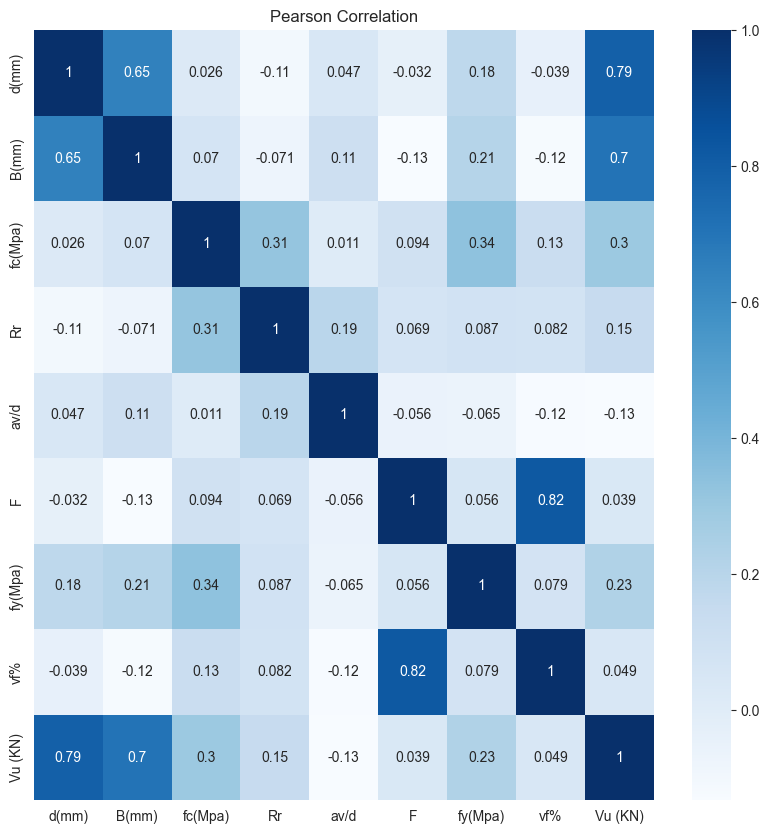

In [25]:
sns.set_style("white")
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation')
sns.heatmap(df.corr(),annot=True, cmap = 'Blues')
plt.show() 

# Define the XGBoost Model

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

XGB1 = GradientBoostingRegressor(random_state=0)
XGB1.fit(X_train, y_train)


GradientBoostingRegressor(random_state=0)

In [27]:
XGB1.feature_importances_

array([0.44797183, 0.35463132, 0.07479714, 0.05313571, 0.05638141,
       0.00847213, 0.00300905, 0.00160143])

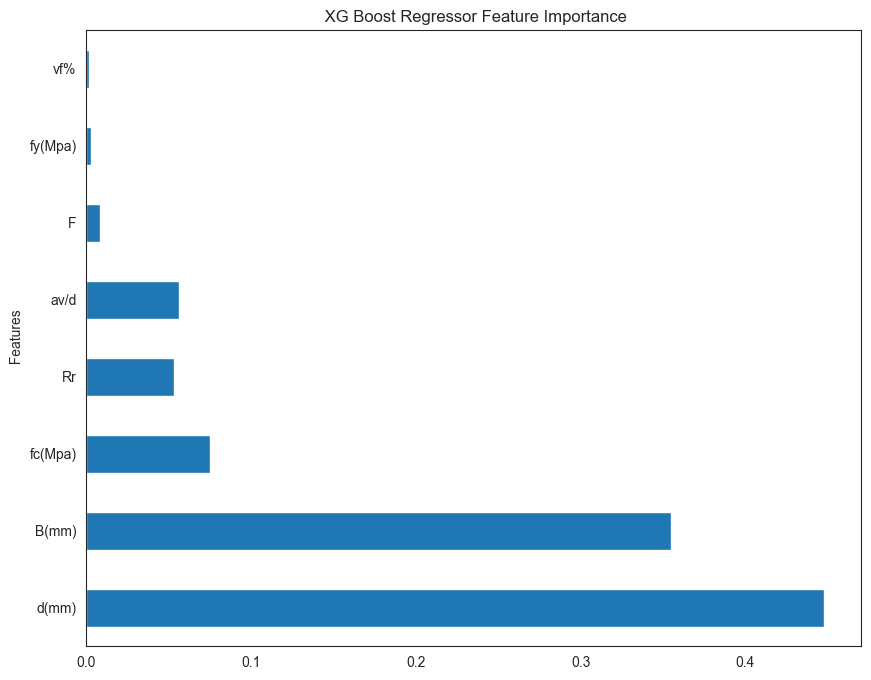

In [28]:
importances = pd.Series(XGB1.feature_importances_ , index=X.columns)
plt.xlabel(" Feature Importance")
plt.ylabel(" Features")
plt.title(" XG Boost Regressor Feature Importance")
importances.plot(kind = 'barh', figsize=(10,8))
plt.show()

# Model Evaluation

In [29]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,XGB1.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,XGB1.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,XGB1.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,XGB1.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,XGB1.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,XGB1.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,XGB1.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,XGB1.predict(X_train)))

The RMSE  on the testing dataset is:  29.698345957052936
The RMSE  on the training dataset is:  16.482056128574975
The MSE  on the testing dataset is:  881.9917525848025
The MSE  on the training dataset is:  271.6581742254959
The MAE  on the testing dataset is:  20.069451498579145
The MAE  on the training daset is:  11.811712749039412
The r2_score on the testing dataset is:  0.9640663747117589
The r2_score on the training dataset is:  0.9875953917438042


# Set up the Hyperparameter Grid for GridSearchCV

In [30]:

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300],
           'colsample_bytree': [0.3, 0.7]}

XGB = xgb.XGBRegressor(random_state = 20)

XGB = GridSearchCV(estimator=XGB, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
XGB.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    lear...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 9, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [31]:
# Initialize model
XGB = xgb.XGBRegressor(random_state=20)

# Perform grid search
grid_search = GridSearchCV(estimator=XGB,  # Corrected to use the model instance (XGB)
                           param_grid=params,
                           cv=5, 
                           scoring='r2', 
                           n_jobs=-1, 
                           verbose=1)

grid_search.fit(X_train, y_train)  # Ensure you fit it before using it

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


In [32]:
XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [33]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,XGB.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,XGB.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,XGB.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,XGB.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,XGB.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,XGB.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,XGB.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,XGB.predict(X_train)))

The RMSE  on the testing dataset is:  33.28396446730042
The RMSE  on the training dataset is:  5.77550380844403
The MSE  on the testing dataset is:  1107.8222906605172
The MSE  on the training dataset is:  33.3564442413515
The MAE  on the testing dataset is:  20.36119959772227
The MAE  on the training daset is:  1.8074627903042868
The r2_score on the testing dataset is:  0.9548657105217904
The r2_score on the training dataset is:  0.9984768592927001


In [34]:
XGB_TEST = XGB1.predict(X_test)

In [35]:
XGB_TRAIN = XGB1.predict(X_train)

# Visualize Actual Vs Predicted

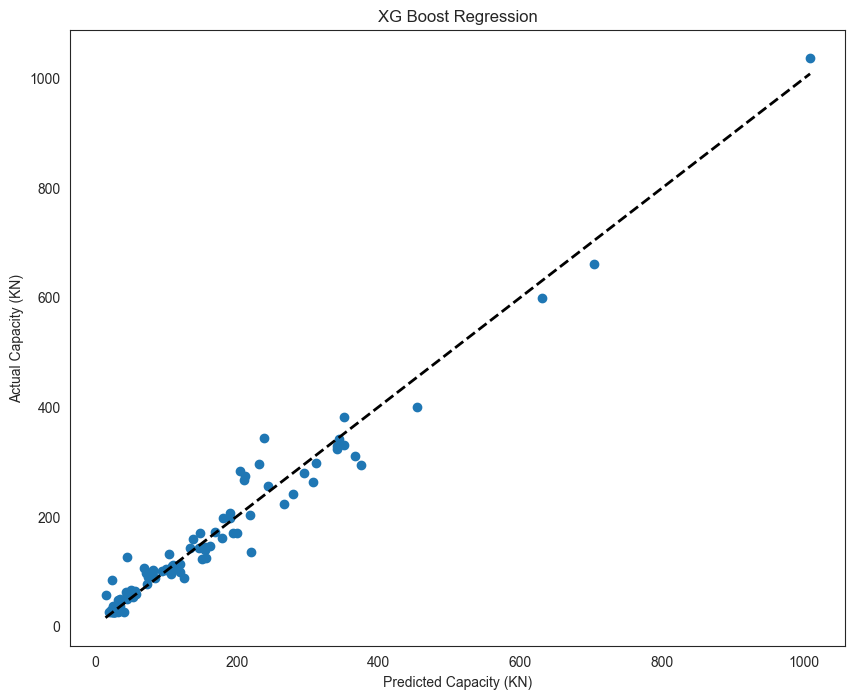

In [36]:
plt.figure(figsize=(10,8))
plt.title('XG Boost Regression')
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.scatter(y_test,XGB_TEST)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Prediction with new data

In [37]:
X1 = np.array(X)

In [38]:
X1[0].reshape(1,-1)

array([[2.5100e+02, 1.5000e+02, 2.8100e+01, 2.6700e-02, 3.0876e+00,
        4.8750e-01, 5.6500e+02, 7.5000e-01]])

In [39]:
XGB1.predict(scaler.transform(X1[0].reshape(1,-1)))

array([105.75463469])

# Pickling The Model For Deployment

In [40]:
import pickle
with open('XGB_pkl', 'wb')as f:
    pickle.dump(XGB1,f)


In [41]:
pickled_model = pickle.load(open('XGB_pkl', 'rb'))


In [42]:
pickled_model.predict(scaler.transform(X1[0].reshape(1,-1)))

array([105.75463469])

In [43]:
Xn = np.array([[221, 152, 34, 0.012, 2.45, 0.3, 448, 0.5]])
pickled_model.predict(scaler.transform(Xn.reshape(1,-1)))

array([62.41969668])

## SHAP (Shaply Additive Explanation)

In [44]:
pip install shap xgboost


Note: you may need to restart the kernel to use updated packages.


In [45]:
import shap
import xgboost

In [46]:
# Compute SHAP values

# Initialize SHAP explainer for your trained XGBoost model
explainer = shap.Explainer(XGB1, X_train)

shap_values = explainer(X_train)

In [47]:

# Ensure X_train is an array before checking
if not isinstance(X_train, np.ndarray):
    X_train = np.array(X_train)

feature_names = [
    "Beam Depth", "Beam Width", "Reinforcement Ratio", "Reinforcement Strength",
    "Shear Span to Depth Ratio", "Compressive Strength of Concrete",
    "Volume Percentage of Steel Fiber", "Steel Fiber Factor"
] 

# Convert to DataFrame
X_train = pd.DataFrame(X_train, columns=feature_names)

In [52]:
# Ensure you are using the best model from GridSearchCV
#best_model = XGB.best_estimator_  
best_model = grid_search.best_estimator_


In [53]:
# Create SHAP Explainer
explainer = shap.Explainer(best_model, X_train)

In [54]:
# Compute SHAP values
shap_values = explainer(X_train)

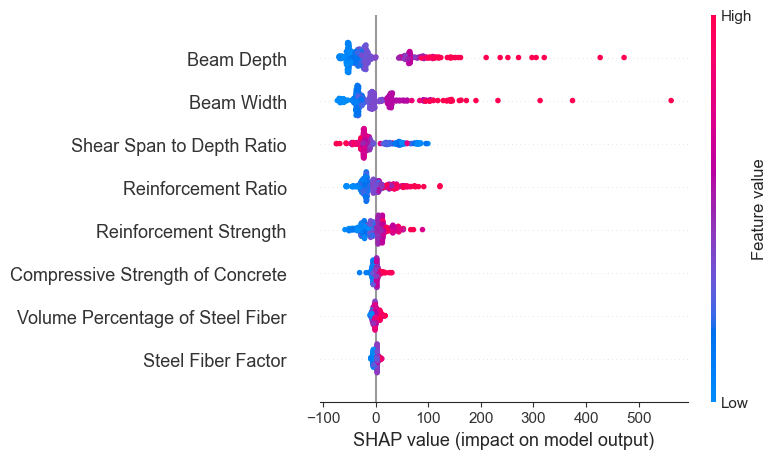

In [55]:
# **Feature Importance Summary Plot**
shap.summary_plot(shap_values, X_train)


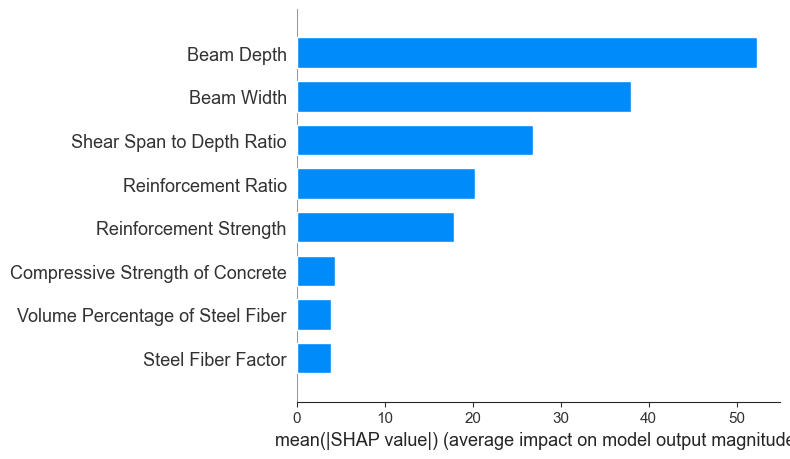

In [56]:
# **Bar Plot for Mean Absolute SHAP Values**
shap.summary_plot(shap_values, X_train, plot_type="bar")

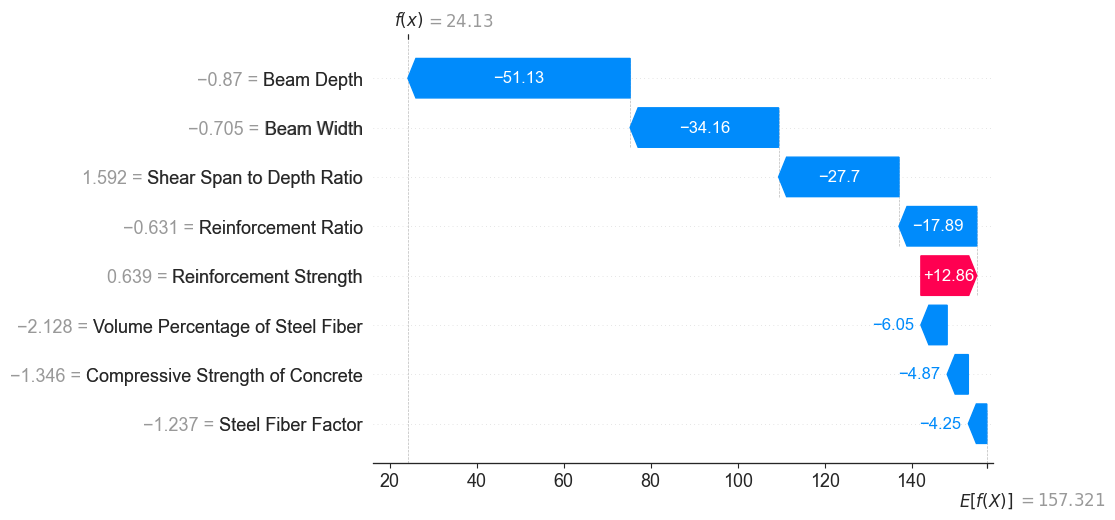

In [57]:
# Waterfall Plot for a Specific Prediction (First Sample)
shap.waterfall_plot(shap_values[0])

## Partial dependence Plot 

In [58]:
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Ensure X_train has the correct shape (8 features)
print(X_train.shape)

(390, 8)


In [60]:
# List of feature names you provided
feature_names = [
    "Beam Depth", "Beam Width", "Reinforcement Ratio", "Reinforcement Strength",
    "Shear Span to Depth Ratio", "Compressive Strength of Concrete",
    "Volume Percentage of Steel Fiber", "Steel Fiber Factor"
]


In [61]:
# Check the number of features
assert X_train.shape[1] == len(feature_names), "Number of features does not match the length of feature_names"

In [63]:

# Extract the best model from GridSearchCV if applicable
#best_xgb = XGB.best_estimator_  
best_xgb = XGB  # No .best_estimator_ here!


In [64]:
# Set custom figure size (adjust width and height as needed)
plt.figure(figsize=(15, 10))  


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [66]:
# Plot partial dependence for all 8 features using indices
features = np.arange(X_train.shape[1])  

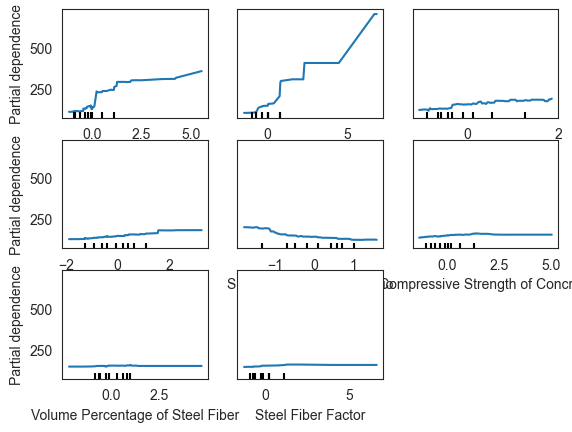

In [67]:
# Plot the partial dependence display
display = PartialDependenceDisplay.from_estimator(
    best_xgb, 
    X_train, 
    features=features,  
    feature_names=feature_names, 
    target=0
)

In [68]:
# Adjust layout to ensure proper spacing and avoid clipping of labels
plt.tight_layout(pad=1) 

<Figure size 640x480 with 0 Axes>

In [69]:
# Show the plot
plt.show()

## Pickling The Model For Deployment

In [78]:
import pickle
with open('XGB_pkl', 'wb')as f:
    pickle.dump(XGB,f)
# Save the SHAP explainer
with open('shap_explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

In [91]:
with open('XGB_pkl','rb') as f:
    loaded_model = pickle.load(f)

with open('shap_explainer.pkl', 'rb') as f:
    loaded_explainer = pickle.load(f)





In [71]:
pickled_model = pickle.load(open('XGB_pkl', 'rb'))

In [72]:
pickled_model.predict(scaler.transform(X1[0].reshape(1,-1)))

array([110.47926], dtype=float32)

In [73]:
Xn = np.array([[221, 152, 34, 0.012, 2.45, 0.3, 448, 0.5]])
pickled_model.predict(scaler.transform(Xn.reshape(1,-1)))

array([57.444862], dtype=float32)

### LIME interpritation

In [74]:
pip install lime


  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.8 MB 5.0 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/12.8 MB 8.8 MB/s eta 0:00:02
   ----------------- ---------------------- 5.5/12.8 MB 9.3 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.8 MB 9.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 9.2 MB/s eta 0:00:01
   ------------------------------------ --- 11.5/12.8 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 9.1 MB/s eta 0:00:00
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-no

  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [75]:
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler

In [76]:
# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [77]:
# Train XGBoost Model
XGB = XGBRegressor()
XGB.fit(X_train_scaled, y_train)

NameError: name 'XGBRegressor' is not defined

In [33]:
# Create LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,  # Use training data here
    feature_names=X.columns.tolist(),
    mode="regression",
    random_state=42
)


In [34]:
# Choose a sample instance to explain
sample_idx = 0
sample = X_test_scaled.iloc[sample_idx]


In [36]:
# Explain the prediction
exp = explainer.explain_instance(sample.values, lambda x: XGB.predict(x).flatten())

# Show the explanation
exp.show_in_notebook()
